# Project: Portfolio - Final Project

**Instructions for Students:**

Please carefully follow these steps to complete and submit your assignment:

1. **Completing the Assignment**: You are required to work on and complete all tasks in the provided assignment. Be disciplined and ensure that you thoroughly engage with each task.
   
2. **Creating a Google Drive Folder**: If you don't previously have a folder for collecting assignments, you must create a new folder in your Google Drive. This will be a repository for all your completed assignment files, helping you keep your work organized and easy to access.
   
3. **Uploading Completed Assignment**: Upon completion of your assignment, make sure to upload all necessary files, involving codes, reports, and related documents into the created Google Drive folder. Save this link in the 'Student Identity' section and also provide it as the last parameter in the `submit` function that has been provided.
   
4. **Sharing Folder Link**: You're required to share the link to your assignment Google Drive folder. This is crucial for the submission and evaluation of your assignment.
   
5. **Setting Permission toPublic**: Please make sure your **Google Drive folder is set to public**. This allows your instructor to access your solutions and assess your work correctly.

Adhering to these procedures will facilitate a smooth assignment process for you and the reviewers.

**Description:**

Welcome to your final portfolio project assignment for AI Bootcamp. This is your chance to put all the skills and knowledge you've learned throughout the bootcamp into action by creating real-world AI application.

You have the freedom to create any application or model, be it text-based or image-based or even voice-based or multimodal.

To get you started, here are some ideas:

1. **Sentiment Analysis Application:** Develop an application that can determine sentiment (positive, negative, neutral) from text data like reviews or social media posts. You can use Natural Language Processing (NLP) libraries like NLTK or TextBlob, or more advanced pre-trained models from transformers library by Hugging Face, for your sentiment analysis model.

2. **Chatbot:** Design a chatbot serving a specific purpose such as customer service for a certain industry, a personal fitness coach, or a study helper. Libraries like ChatterBot or Dialogflow can assist in designing conversational agents.

3. **Predictive Text Application:** Develop a model that suggests the next word or sentence similar to predictive text on smartphone keyboards. You could use the transformers library by Hugging Face, which includes pre-trained models like GPT-2.

4. **Image Classification Application:** Create a model to distinguish between different types of flowers or fruits. For this type of image classification task, pre-trained models like ResNet or VGG from PyTorch or TensorFlow can be utilized.

5. **News Article Classifier:** Develop a text classification model that categorizes news articles into predefined categories. NLTK, SpaCy, and sklearn are valuable libraries for text pre-processing, feature extraction, and building classification models.

6. **Recommendation System:** Create a simplified recommendation system. For instance, a book or movie recommender based on user preferences. Python's Surprise library can assist in building effective recommendation systems.

7. **Plant Disease Detection:** Develop a model to identify diseases in plants using leaf images. This project requires a good understanding of convolutional neural networks (CNNs) and image processing. PyTorch, TensorFlow, and OpenCV are all great tools to use.

8. **Facial Expression Recognition:** Develop a model to classify human facial expressions. This involves complex feature extraction and classification algorithms. You might want to leverage deep learning libraries like TensorFlow or PyTorch, along with OpenCV for processing facial images.

9. **Chest X-Ray Interpretation:** Develop a model to detect abnormalities in chest X-ray images. This task may require understanding of specific features in such images. Again, TensorFlow and PyTorch for deep learning, and libraries like SciKit-Image or PIL for image processing, could be of use.

10. **Food Classification:** Develop a model to classify a variety of foods such as local Indonesian food. Pre-trained models like ResNet or VGG from PyTorch or TensorFlow can be a good starting point.

11. **Traffic Sign Recognition:** Design a model to recognize different traffic signs. This project has real-world applicability in self-driving car technology. Once more, you might utilize PyTorch or TensorFlow for the deep learning aspect, and OpenCV for image processing tasks.

**Submission:**

Please upload both your model and application to Huggingface or your own Github account for submission.

**Presentation:**

You are required to create a presentation to showcase your project, including the following details:

- The objective of your model.
- A comprehensive description of your model.
- The specific metrics used to measure your model's effectiveness.
- A brief overview of the dataset used, including its source, pre-processing steps, and any insights.
- An explanation of the methodology used in developing the model.
- A discussion on challenges faced, how they were handled, and your learnings from those.
- Suggestions for potential future improvements to the model.
- A functioning link to a demo of your model in action.

**Grading:**

Submissions will be manually graded, with a select few given the opportunity to present their projects in front of a panel of judges. This will provide valuable feedback, further enhancing your project and expanding your knowledge base.

Remember, consistent practice is the key to mastering these concepts. Apply your knowledge, ask questions when in doubt, and above all, enjoy the process. Best of luck to you all!


In [1]:
# @title #### Student Identity
student_id = "REATFAHR" # @param {type:"string"}
name = "Nurul Asmi Amalia" # @param {type:"string"}
drive_link = "https://drive.google.com/drive/folders/1OoF8r7vB02NdSHiQUc-dwSlOwU5NmGEi?usp=drive_link"  # @param {type:"string"}
assignment_id = "00_portfolio_project"

## Installation and Import `rggrader` Package

In [2]:
%pip install rggrader
from rggrader import submit_image
from rggrader import submit

## Working Space

### Project Description

**acne severity classification.**

In [3]:
#Write any package/module installation that you need here
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.datasets import ImageFolder

### Load the Dataset

https://www.kaggle.com/datasets/gsaiman/acne-level

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
ls /content/drive/MyDrive/Mastering-AI-03-REATFAHR-Nurul-Asmi-Amalia/Final-Project/

acne-grading-dataset/  ai-portfolio.ipynb  ai-portfolio-v2.ipynb  ai-portfolio-v3.ipynb  Dataset/


In [6]:
dataset_dir = '/content/drive/MyDrive/Mastering-AI-03-REATFAHR-Nurul-Asmi-Amalia/Final-Project/Dataset'
acne_dataset = os.listdir(dataset_dir)
acne_dataset

['Level 1', 'Level 2', 'Level 0', 'Level 3']

In [7]:
# Total dataset
total = 0

for i in acne_dataset:
    dir = os.path.join(dataset_dir, i)
    num = len(os.listdir(dir))
    print(i+':', num, 'data')
    total = total + num

print('__________________________________')
print('\nTotal:', total, 'data')

Level 1: 637 data
Level 2: 186 data
Level 0: 497 data
Level 3: 137 data
__________________________________

Total: 1457 data


### Split the Dataset

In [8]:
!pip install split-folders

In [9]:
# Split folder to divide the dataset into training, validation, and testing data
import splitfolders
splitfolders.ratio(dataset_dir, output="/content/dataset", seed=42, ratio=(0.8, 0.1, 0.1))

Copying files: 1457 files [01:53, 12.79 files/s]


In [10]:
# dataset directory
train_dir = '/content/dataset/train'
val_dir = '/content/dataset/val'
test_dir = '/content/dataset/test'

#### Data Preprocessing

In [11]:
!pip install opencv-python-headless

In [12]:
import cv2
import numpy as np
from PIL import Image, ImageEnhance
import torchvision.transforms as transforms

In [13]:
def histogram_equalization(img):
    img = np.array(img)
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    img = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    return Image.fromarray(img)

def median_filter(img, kernel_size=3):
    img = np.array(img)
    img = cv2.medianBlur(img, kernel_size)
    return Image.fromarray(img)

def enhance_image(img):
    img = ImageEnhance.Color(img).enhance(1.2)  # Adjust color balance
    img = ImageEnhance.Contrast(img).enhance(1.2)  # Adjust contrast
    img = ImageEnhance.Sharpness(img).enhance(1.2)  # Adjust sharpness
    return img


In [14]:
# Define enhanced data transforms with preprocessing
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Lambda(histogram_equalization),
    transforms.Lambda(median_filter),
    transforms.Lambda(enhance_image),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Lambda(histogram_equalization),
    transforms.Lambda(median_filter),
    transforms.Lambda(enhance_image),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [15]:
# Load datasets
train_dataset = ImageFolder(root=train_dir, transform=train_transform)
val_dataset = ImageFolder(root=val_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


### Build Model

In [16]:
!pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━

In [17]:
from efficientnet_pytorch import EfficientNet

# Load a pre-trained EfficientNet model
model = EfficientNet.from_pretrained('efficientnet-b0')

# Modify the last layer to fit the number of classes (assuming 4 classes: mild, moderate, severe)
num_classes = 4
model._fc = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(model._fc.in_features, num_classes)
)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Print the model architecture
print(model)


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 127MB/s] 


Loaded pretrained weights for efficientnet-b0
EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kern

In [19]:
from torch.optim.lr_scheduler import StepLR

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize learning rate scheduler
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

In [20]:
# Function to evaluate the model on a given dataset
def evaluate_model(loader, model, criterion):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    average_loss = running_loss / len(loader)
    return accuracy, average_loss

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Step the learning rate scheduler
    scheduler.step()

    # Calculate accuracies and losses
    train_accuracy = correct_train / total_train
    val_accuracy, val_loss = evaluate_model(val_loader, model, criterion)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Training Accuracy: {train_accuracy * 100:.2f}%, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%")


Epoch [1/20], Loss: 1.0848, Training Accuracy: 48.32%, Validation Loss: 2.2587, Validation Accuracy: 44.06%
Epoch [2/20], Loss: 0.8781, Training Accuracy: 58.90%, Validation Loss: 1.4230, Validation Accuracy: 56.64%
Epoch [3/20], Loss: 0.7696, Training Accuracy: 64.23%, Validation Loss: 2.1532, Validation Accuracy: 57.34%
Epoch [4/20], Loss: 0.7352, Training Accuracy: 67.67%, Validation Loss: 1.2504, Validation Accuracy: 62.24%
Epoch [5/20], Loss: 0.7279, Training Accuracy: 69.30%, Validation Loss: 0.8703, Validation Accuracy: 63.64%
Epoch [6/20], Loss: 0.5793, Training Accuracy: 77.04%, Validation Loss: 0.9120, Validation Accuracy: 62.94%
Epoch [7/20], Loss: 0.5607, Training Accuracy: 75.84%, Validation Loss: 0.9459, Validation Accuracy: 67.83%
Epoch [8/20], Loss: 0.5094, Training Accuracy: 78.33%, Validation Loss: 0.8460, Validation Accuracy: 67.13%
Epoch [9/20], Loss: 0.4885, Training Accuracy: 80.14%, Validation Loss: 0.7918, Validation Accuracy: 67.13%
Epoch [10/20], Loss: 0.4764,

In [21]:

# Evaluate the model on the test set
test_accuracy, test_loss = evaluate_model(test_loader, model, criterion)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%")

Test Loss: 0.5727, Test Accuracy: 76.82%


In [22]:
# Initialize lists to store loss and accuracy values
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Step the learning rate scheduler
    scheduler.step()

    # Calculate accuracies and losses
    train_accuracy = correct_train / total_train
    val_accuracy, val_loss = evaluate_model(val_loader, model, criterion)
    train_loss = running_loss / len(train_loader)

    # Store values
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy * 100:.2f}%, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%")

# Evaluate the model on the test set
test_accuracy, test_loss = evaluate_model(test_loader, model, criterion)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch [1/30], Loss: 0.4321, Training Accuracy: 81.60%, Validation Loss: 0.7945, Validation Accuracy: 67.13%
Epoch [2/30], Loss: 0.4463, Training Accuracy: 81.94%, Validation Loss: 0.7975, Validation Accuracy: 67.13%
Epoch [3/30], Loss: 0.4403, Training Accuracy: 81.43%, Validation Loss: 0.7963, Validation Accuracy: 67.13%
Epoch [4/30], Loss: 0.4494, Training Accuracy: 80.40%, Validation Loss: 0.7923, Validation Accuracy: 67.13%
Epoch [5/30], Loss: 0.4523, Training Accuracy: 82.29%, Validation Loss: 0.7890, Validation Accuracy: 66.43%
Epoch [6/30], Loss: 0.4258, Training Accuracy: 83.58%, Validation Loss: 0.7927, Validation Accuracy: 66.43%
Epoch [7/30], Loss: 0.4246, Training Accuracy: 82.37%, Validation Loss: 0.7952, Validation Accuracy: 67.13%
Epoch [8/30], Loss: 0.4340, Training Accuracy: 82.55%, Validation Loss: 0.7951, Validation Accuracy: 67.13%
Epoch [9/30], Loss: 0.4155, Training Accuracy: 82.89%, Validation Loss: 0.7940, Validation Accuracy: 67.13%
Epoch [10/30], Loss: 0.4429,

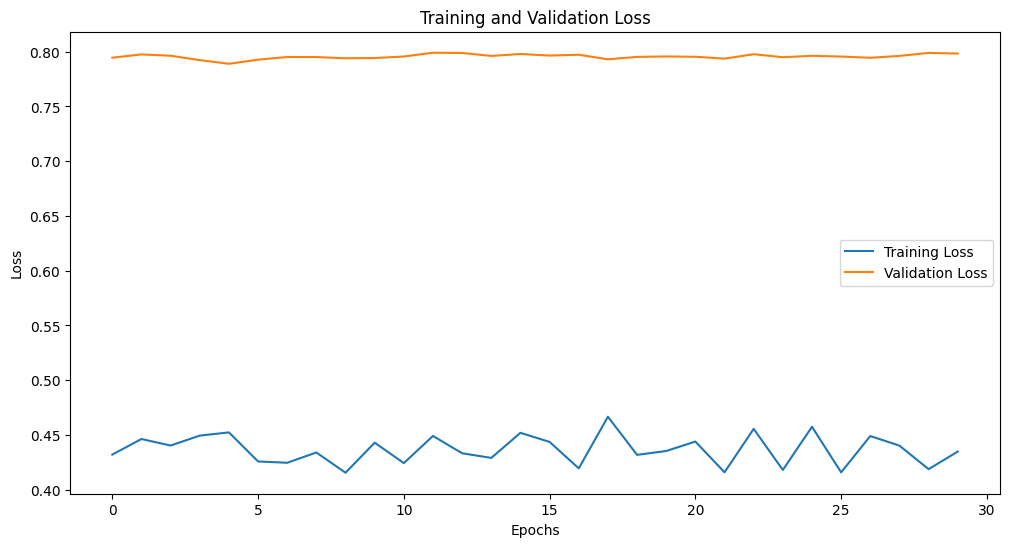

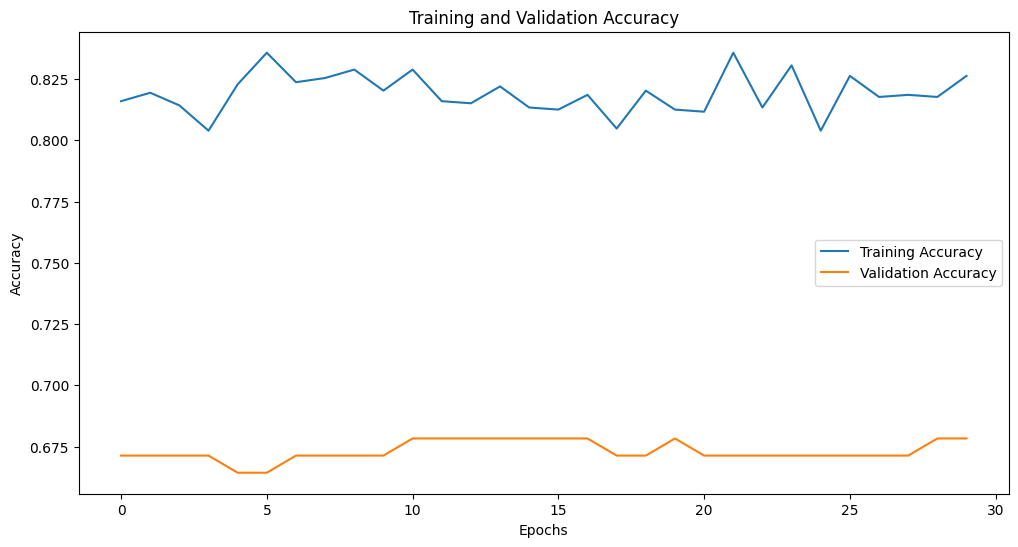

In [23]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [24]:
# Save model
model_path = '/content/drive/MyDrive/Mastering-AI-03-REATFAHR-Nurul-Asmi-Amalia/Final-Project/model.pth'
torch.save(model.state_dict(), model_path)

https://huggingface.co/naamalia23/acne-severity-classification

### Testing on Gradio

Saving levle3_125.jpg to levle3_125.jpg
Predicted Class: Level 3 (Confidence: 87.47%)


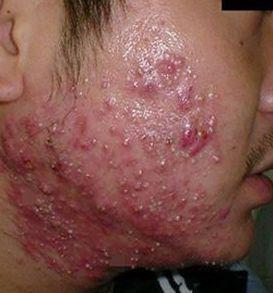

In [29]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from IPython.display import display
from efficientnet_pytorch import EfficientNet
from google.colab import files

# Path to the saved model
model_path = '/content/drive/MyDrive/Mastering-AI-03-REATFAHR-Nurul-Asmi-Amalia/Final-Project/model.pth'

# Load a pre-trained EfficientNet model
model = EfficientNet.from_name('efficientnet-b0')
num_classes = 4
model._fc = torch.nn.Sequential(
    torch.nn.Dropout(p=0.5),
    torch.nn.Linear(model._fc.in_features, num_classes)
)

# Load the saved model weights
model.load_state_dict(torch.load(model_path))
model.eval()

# Transformation for the input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Choose an image from the device
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load and preprocess the input image
input_image = Image.open(image_path).convert("RGB")
input_tensor = transform(input_image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

# Make predictions
with torch.no_grad():
    output = model(input_batch)

# Calculate probabilities and predicted class
probabilities = torch.nn.functional.softmax(output[0], dim=0)
confidence_percentage, predicted_class = torch.max(probabilities, 0)

# Display the predicted class and confidence
print(f"Predicted Class: {train_dataset.classes[predicted_class]} (Confidence: {confidence_percentage.item() * 100:.2f}%)")

# Display the input image
display(input_image)


## Submit Notebook

In [25]:
portfolio_link = "https://huggingface.co/naamalia23/acne-severity-classification"
presentation_link = "https://docs.google.com/presentation/d/1ZB8I-XdkwxMDuw1uQreAf86YuyBUND94/edit?usp=drive_link&ouid=108990096137881054335&rtpof=true&sd=true"

question_id = "01_portfolio_link"
submit(student_id, name, assignment_id, str(portfolio_link), question_id, drive_link)

question_id = "02_presentation_link"
submit(student_id, name, assignment_id, str(presentation_link), question_id, drive_link)

'Assignment successfully submitted'

# FIN